In [569]:
import pandas as pd
import numpy as np
import seaborn as sn
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np



# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G


In [570]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))




In [571]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

In [572]:

le = LabelEncoder()
def transform_now(data):
    data[:,0]=le.fit_transform(data[:,0])

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     # print(xx)
     data[:,0]=le.inverse_transform(xx)

START EDIT

In [573]:
def process_fill(index_start,index_stop,info):
    count_sub = 1 # count index[i] each value is 0 and bring it plot index or divide
    dis_sub = 0  # find distance of value for example 10 _ _ _ 40 --> 40 - 10 = 30 = dis_sub
    dist = 0  # dist = dis_sub/count_sub
    size_info = index_stop-index_start
    for i in range(index_start,index_stop):
        if info[i] == 0:
            count_sub += 1
            # if it have a value in start day [10 0 0 0 0 0 0 0 0 0]
            if info[index_start] != 0 and count_sub == size_info:
                dist = info[index_start]
                for j in range(count_sub-1):
                    if info[j+1]==0:
                       info[j+1] = float(info[j]+dist)
                count_sub = 1
            elif i+1 ==  index_stop: #  [0  0  0  0  50  0  0  0  0], [ 0  0  0  0 50  0  0  0  0  0] 
                if count_sub %2 !=0:
                    dist = int(info[i-count_sub+1]/count_sub) 
                else:
                    dist = int(info[i-count_sub+1]/(count_sub-1))
                    if info[i-1] !=0:
                        info[i] = float(int(info[i-1])+(int((info[i-1]*6)/100))) ;"""decrease when value in last day over """
                        break
                for j in reversed(range(count_sub)):
                    # pass
                    if info[i-j] ==0:
                        info[i-j] = float(info[i-j-1]+dist)
                count_sub = 1
        elif info[i] != 0 :
            # if it have a value in final day [0 0 0 0 0 0 0 0 0 100]
            if count_sub == size_info:
                dist = int(info[i]/(count_sub))
                for j in reversed(range(count_sub)):
                    if info[j-1] ==0:
                        info[j-1] = float(info[j]-dist)
                count_sub = 1
            # if it have a value in start and final day [10 0 0 0 0 0 0 0 0 100] OR [7,0,0,10,0,15,0,0,30] OR [0 20 0 40 0 60 0 80 0 100]
            elif count_sub != 1:
                dis_sub = info[i] if count_sub>i else info[i]-info[i-count_sub]
                dist = int(dis_sub/count_sub)
                for j in range(count_sub):
                    if info[i-j-1] ==0 and i-j-1 >=0:
                        info[i-j-1] = float(info[i-j]-dist)
                count_sub = 1
    return info
    

In [574]:
"""for fill value miss by distance"""
def FILL_CUMSALES(get_group_by,info):
    print(info.shape[0])
    index_start =0
    index_stop =0
    for i in range(len(get_group_by)):
        if i ==0:
            sub_arr = info[0:get_group_by['Counts'][i],1]
            sub_arr=process_fill(0,get_group_by['Counts'][i],sub_arr)
            info[0:get_group_by['Counts'][i],1] =sub_arr
            index_stop += get_group_by['Counts'][i]
        else:
            index_start +=get_group_by['Counts'][i-1]
            index_stop +=get_group_by['Counts'][i]
            sub_arr = info[index_start:index_stop,1]
            sub_arr = process_fill(0,get_group_by['Counts'][i],sub_arr)
            info[index_start:index_stop,1] = sub_arr


In [575]:
def fill_value_miss(miss_data):
    cols =['Day','Cumsales']
    df = pd.DataFrame(miss_data,columns=cols)
    sub_day = []
    full_day = df.copy()
    for i in range(len(df)):
        sub_day.append(df['Day'][i][0:7]) 
    for i in range(len(df)):
        df['Day'][i] = sub_day[i]
    get_group_by = df.groupby('Day').size().reset_index(name='Counts')
    full_day = full_day.to_numpy() 
    FILL_CUMSALES(get_group_by,full_day)
    # for i in range(full_day.shape[0]):    
    #     print(full_day[i,0]," ",full_day[i,1])
    transform_now(full_day)
    return full_day

def find_value_miss(G):
    print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0, 1], G[0, 2], G[0, 3]))
    print("start : {}, end : {} ".format(G[0, 0], G[-1, 0]))
    date_full = gendate(G[-1, 0], G[0, 0])
    miss_data = [[0]*2 for i in range(date_full.shape[0])]
    miss_data = np.array(miss_data, dtype=object)
    count_miss_day = 0
    origin_index = 0
    for i in range(date_full.shape[0]):
        if G[origin_index, 0] == date_full[i]:  # G[G == date_full[i]]:
            miss_data[i][0] = G[origin_index, 0]
            miss_data[i][1] = G[origin_index, 5]
            origin_index += 1
        else:
            miss_data[i][0] = date_full[i]
            miss_data[i][1] = 0.0 #np.nan #float('NaN') #None
            count_miss_day += 1
    miss_data_no_fill = miss_data.copy()
    cleaned_data = fill_value_miss(miss_data)
    print('missing CumSales of invidual day =', count_miss_day)
    return cleaned_data,miss_data_no_fill


In [576]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 



In [577]:

def find_day(*Date):
    DATE = []
    month = [0,31,59,90,120,151,181,212,243,273,304,334,365]
    month_1 = [0,31,60,91,121,152,183,213,244,274,305,335,366]
    Year = [0,365,730,1096,1461,1826,2191,2557,2922,3287,3652,4018,4383]
    for i in range(len(Date)):
        match = 0
        if Date[i][:4] == "2012" or Date[i][:4] == "2016" or Date[i][:4] == "2020":
            match += Year[int(Date[i][2:4])-10]+month_1[int(Date[i][5:7])-1]+int(Date[i][-2:])-1
        else:
            match += Year[int(Date[i][2:4])-10]+month[int(Date[i][5:7])-1]+int(Date[i][-2:])-1
        DATE.append(match)
    return DATE

In [578]:
# A = find_group(5,1,1)

# info,no_fill=find_value_miss(All_Group[A])
# inverse_d_new(info)
# kk = find_day("2012-12-02","2012-02-01","2010-01-01")



ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
4534
missing CumSales of invidual day = 269


END EDIT 

In [579]:
# imort model 
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [580]:
# select G and preparations
# A=find_group(7,3,2)
A=find_group(5,1,1)
# A=find_group(4,3,2)
info,before = find_value_miss(All_Group[A])
plot_st_day = []
plot_stop_day = []
plot_true_day =[]
plot_true_sale =[]
plot_pred = []
MAE_VALUE = []
MSE_VALUE = []
R_score =[]


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
4534
missing CumSales of invidual day = 269


#### slide 7

In [581]:
# for i in range(before.shape[0]):
#     print(before[i,0]," ",before[i,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2010-02-01 to 2010-02-28 


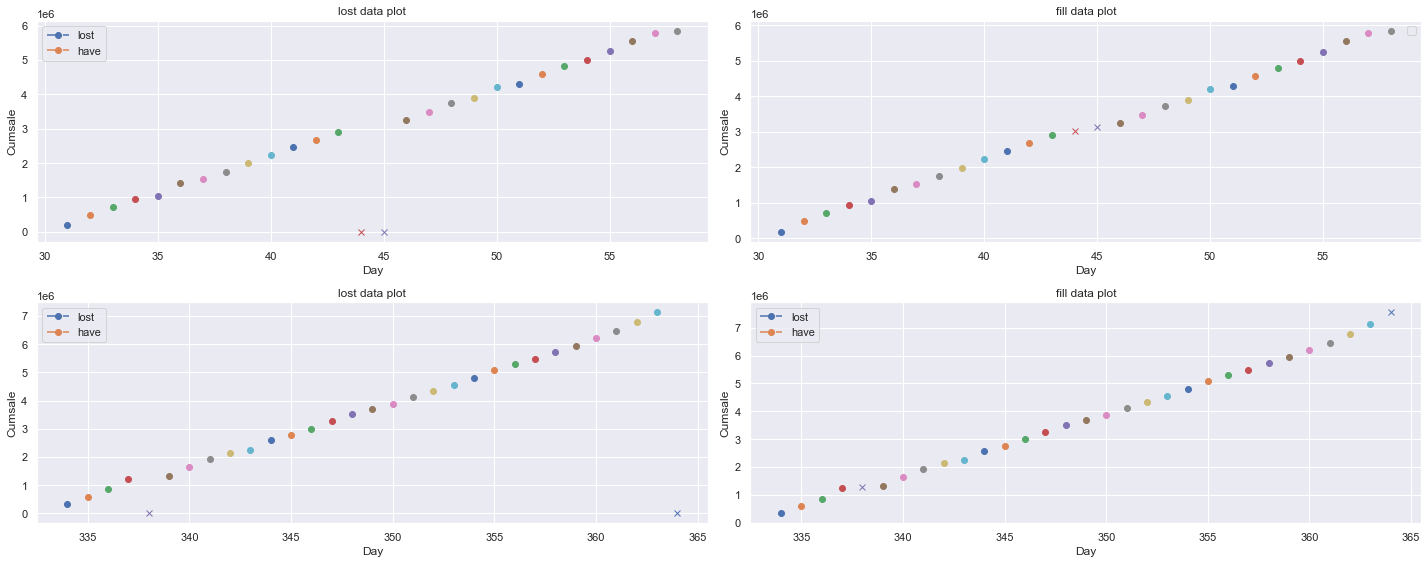

In [582]:
## สำหรับแสดงข้อมูลที่หายไป
print('{} to {} '.format(before[31,0],before[58,0]))
kk = LabelEncoder()
before[:,0] = kk.fit_transform(before[:,0])
plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
for i in range(31,59):
    if before[i,1] == 0 :
        plt.plot(before[i,0],0,marker='x',linestyle='-.')
    else :
        plt.plot(before[i,0],before[i,1],marker='o',linestyle='-.')
plt.legend(['lost','have'])
plt.title('lost data plot')
plt.xlabel('Day')
plt.ylabel('Cumsale')
plt.tight_layout()

plt.subplot(2,2,2)
for i in range(31,59):
    if before[i,1] == 0 :
        plt.plot(before[i,0],info[i,1],marker='x',linestyle='-.')
    else :
        plt.plot(before[i,0],before[i,1],marker='o',linestyle='-.')
plt.legend()
plt.title('fill data plot')
plt.xlabel('Day')
plt.ylabel('Cumsale')
plt.tight_layout()


# ปัญหา
plt.subplot(2,2,3)
for i in range(334,365):
    if before[i,1] == 0 :
        plt.plot(before[i,0],0,marker='x',linestyle='-.')
    else :
        plt.plot(before[i,0],before[i,1],marker='o',linestyle='-.')
plt.legend(['lost','have'])
plt.title('lost data plot')
plt.xlabel('Day')
plt.ylabel('Cumsale')
plt.tight_layout()

plt.subplot(2,2,4)
for i in range(334,365):
    if before[i,1] == 0 :
        plt.plot(before[i,0],info[i,1],marker='x',linestyle='-.')
    else :
        plt.plot(before[i,0],before[i,1],marker='o',linestyle='-.')
plt.legend(['lost','have'])
plt.title('fill data plot')
plt.xlabel('Day')
plt.ylabel('Cumsale')
plt.tight_layout()
# inverse_d_new(info)
# print(info[334:364,0]) # '2010-12-30'
# print(info[334:365,0]) # '2010-12-31'



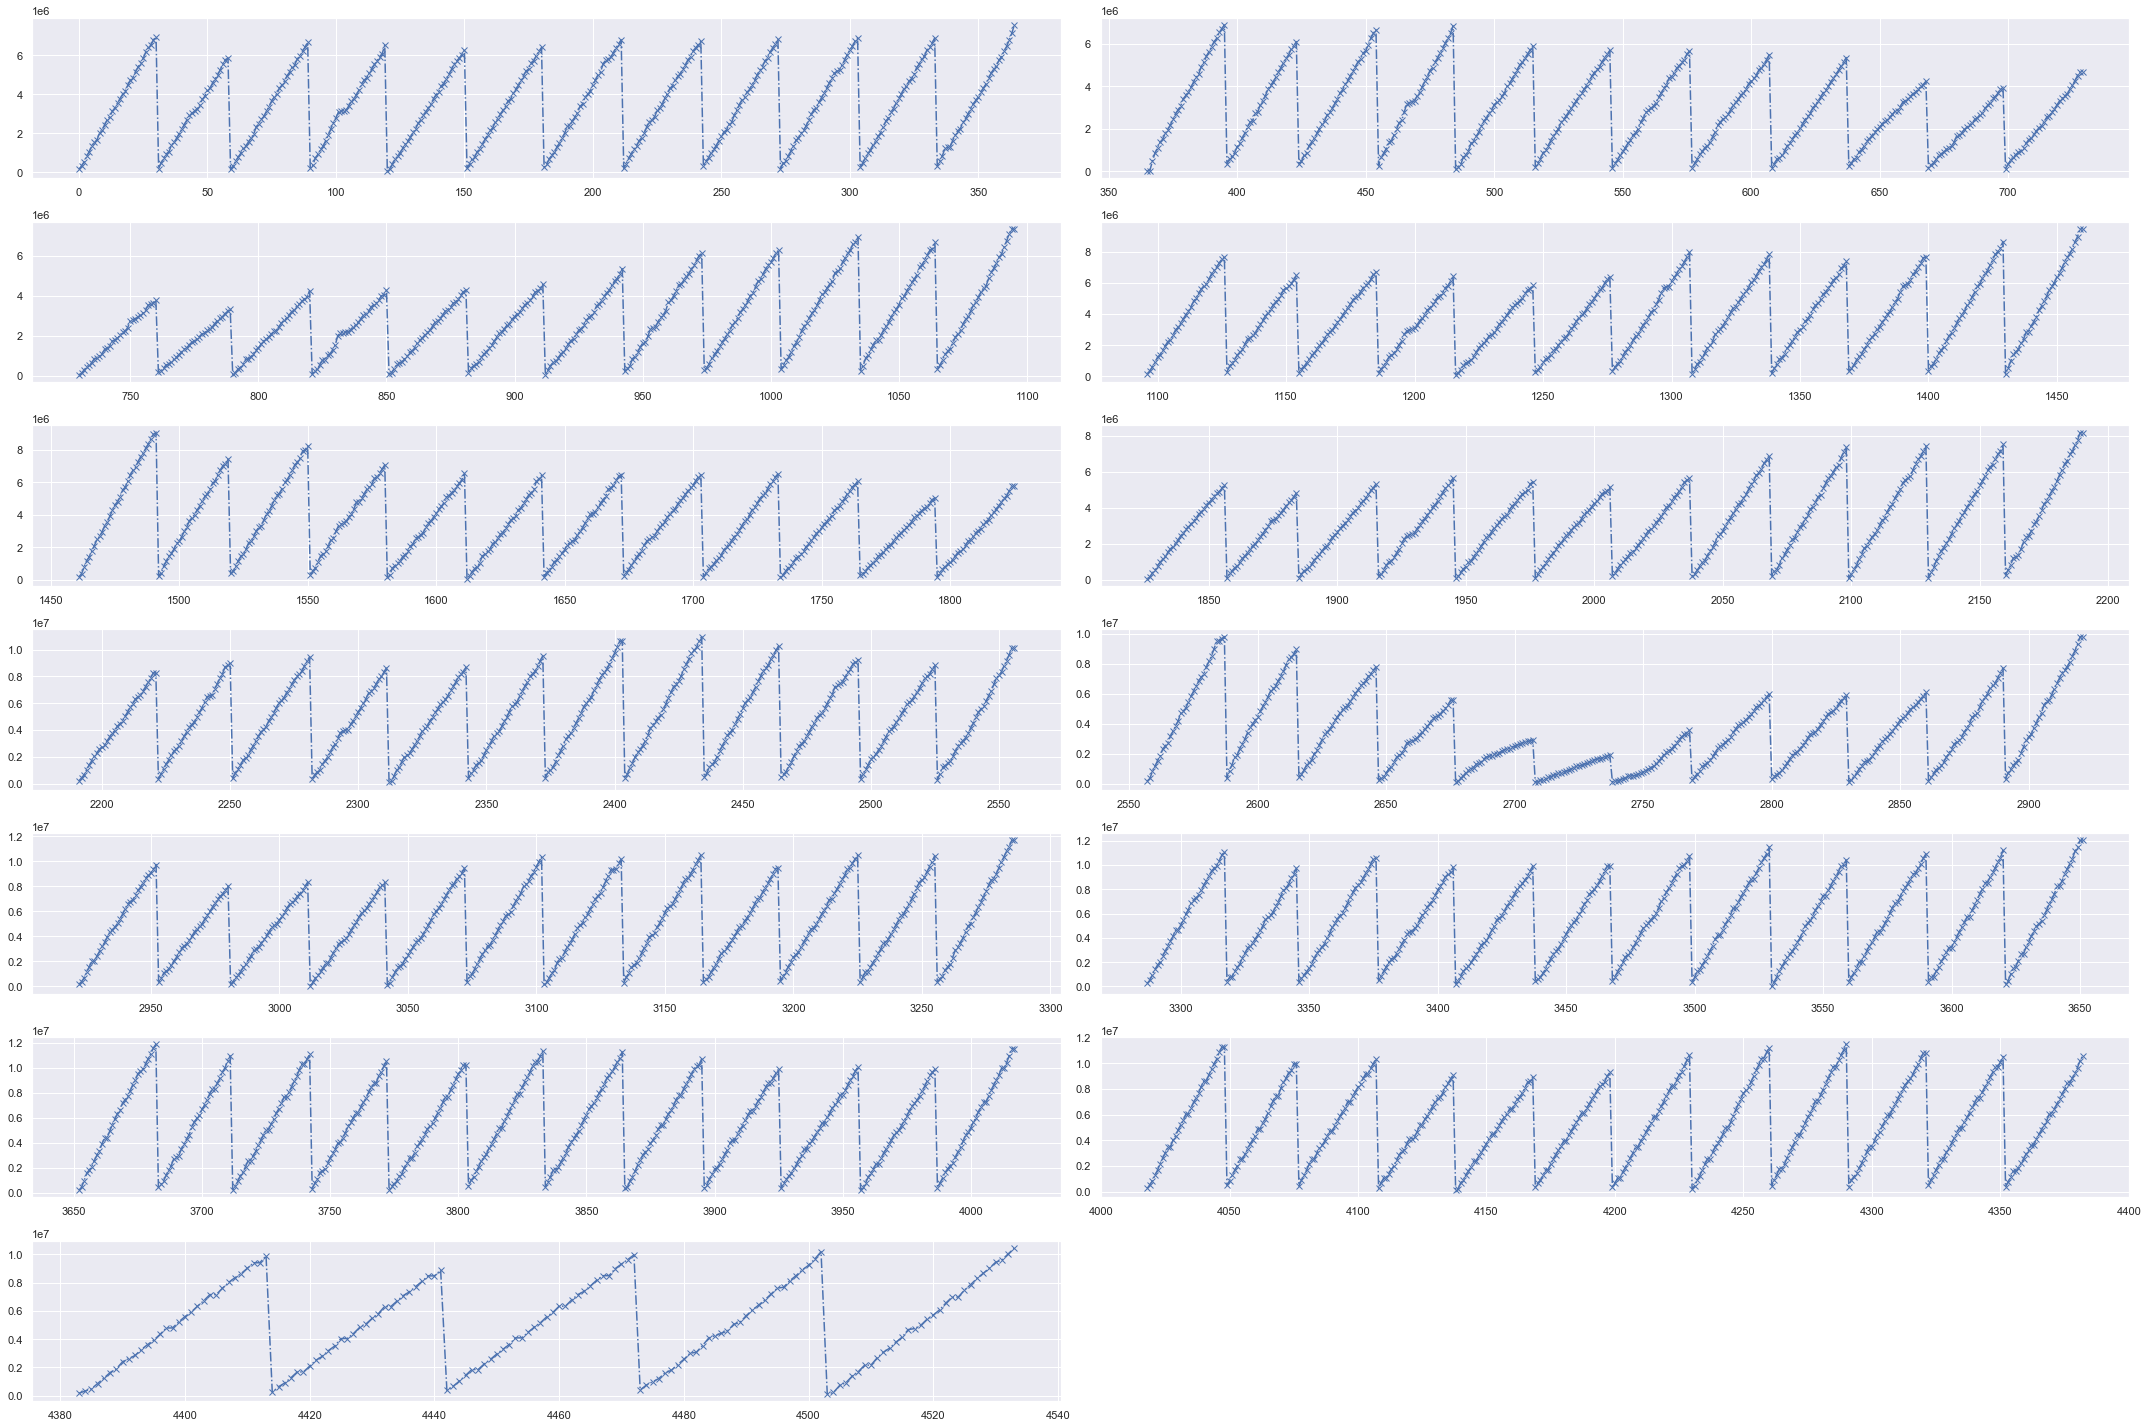

In [583]:
plt.figure(figsize=[30,20])
#2010
plt.subplot(7,2,1)
plt.plot(info[:365,0],info[:365,1],marker='x',linestyle='-.')
plt.tight_layout()

# #2011
plt.subplot(7,2,2)
plt.plot(info[365:730,0],info[365:730,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

#2012
plt.subplot(7,2,3)
plt.plot(info[730:1096,0],info[730:1096,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2013
plt.subplot(7,2,4)
plt.plot(info[1096:1461,0],info[1096:1461,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2014
plt.subplot(7,2,5)
plt.plot(info[1461:1826,0],info[1461:1826,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2015
plt.subplot(7,2,6)
plt.plot(info[1826:2191,0],info[1826:2191,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2016
plt.subplot(7,2,7)
plt.plot(info[2191:2557,0],info[2191:2557,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2017
plt.subplot(7,2,8)
plt.plot(info[2557:2922,0],info[2557:2922,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2018
plt.subplot(7,2,9)
plt.plot(info[2922:3287,0],info[2922:3287,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2019
plt.subplot(7,2,10)
plt.plot(info[3287:3652,0],info[3287:3652,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2020
plt.subplot(7,2,11)
plt.plot(info[3652:4018,0],info[3652:4018,1],marker='x',linestyle='-.')
plt.tight_layout()
# plt.show()

# #2021
plt.subplot(7,2,12)
plt.plot(info[4018:4383,0],info[4018:4383,1],marker='x',linestyle='-.')
plt.tight_layout()


# #2022
plt.subplot(7,2,13)
plt.plot(info[4383:,0],info[4383:,1],marker='x',linestyle='-.')
plt.tight_layout()

#### slide 10


In [584]:
##### month 1 ##### LinearRegression

kk = find_day("2010-01-01","2010-01-03","2010-01-31")
x_train = info[kk[0]:kk[1]+1,0]#3 วัน
y_train = info[kk[0]:kk[1]+1,1]
dtree = Lasso(alpha=0.1)
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[kk[2],0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[kk[2],1]],pred))
print("mean_squared_error =",mean_squared_error([info[kk[2],1]],pred))
# info[30,1]


MAE_VALUE.append(mean_absolute_error([info[kk[2],1]],pred))
MSE_VALUE.append(mean_squared_error([info[kk[2],1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [5769444.31666667]
R2_core = 99.541
mean_absolute_error = 1166506.6833333336
mean_squared_error = 1360737842261.3342


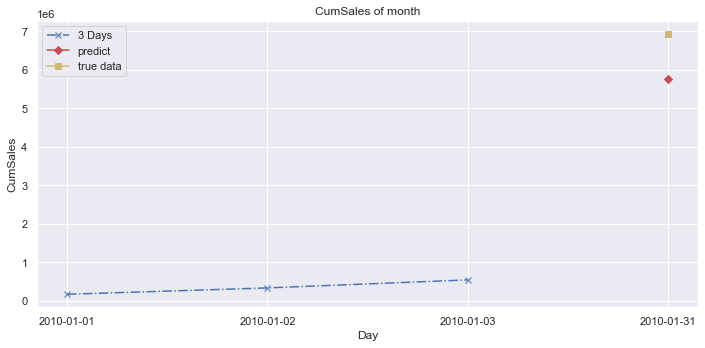

In [585]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [586]:
##### month 2 ##### linearRegression

# print(info[31:41])
# print(All_Group[A][30:56]) # 30 to 56


x_train = info[31:34,0]#3 วัน
y_train = info[31:34,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[58,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[58,1]],pred))
print("mean_squared_error =",mean_squared_error([info[58,1]],pred))
info[58,1]


MAE_VALUE.append(mean_absolute_error([info[58,1]],pred))
MSE_VALUE.append(mean_squared_error([info[58,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [7464800.33333333]
R2_core = 99.456
mean_absolute_error = 1616723.3333333293
mean_squared_error = 2613794336544.431


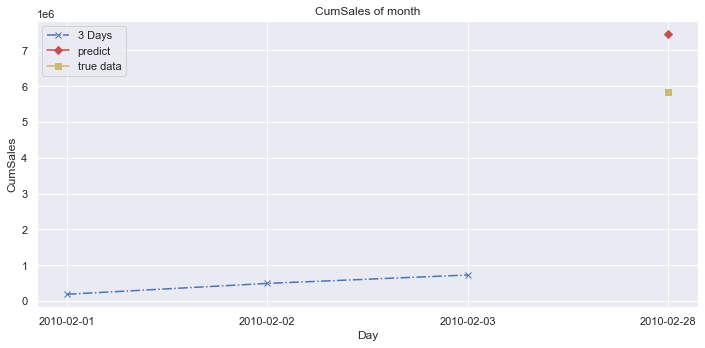

In [587]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [588]:
##### month 3 ##### linearRegression

# print(info[59:90])
# print(All_Group[A][30:56]) # 30 to 56

x_train = info[59:62,0]#10 วัน
y_train = info[59:62,1]
dtree =  LinearRegression   ()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[89,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[89,1]],pred))
print("mean_squared_error =",mean_squared_error([info[89,1]],pred))
info[89,1]
# print(info[89])
# print(info[59:69])


MAE_VALUE.append(mean_absolute_error([info[89,1]],pred))
MSE_VALUE.append(mean_squared_error([info[89,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [6605157.16666666]
R2_core = 97.407
mean_absolute_error = 67499.83333333582
mean_squared_error = 4556227500.028113


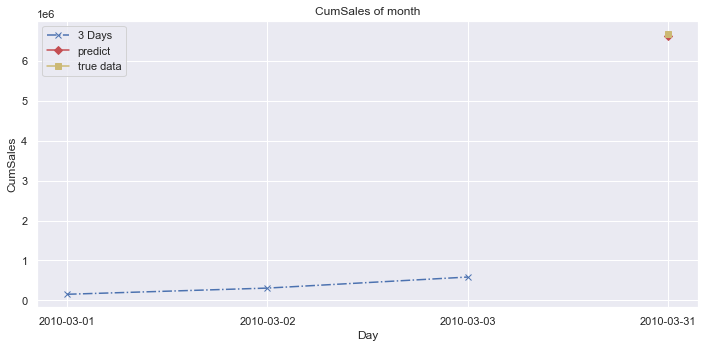

In [589]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [590]:
##### month 4 ##### linearRegression

# print(info[90:120])
# print(All_Group[A][30:56]) # 30 to 56


x_train = info[90:93,0]#10 วัน
y_train = info[90:93,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[119,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[119,1]],pred))
print("mean_squared_error =",mean_squared_error([info[119,1]],pred))
info[119,1]
# print(info[90:100])


MAE_VALUE.append(mean_absolute_error([info[119,1]],pred))
MSE_VALUE.append(mean_squared_error([info[119,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7463934.]
R2_core = 92.571
mean_absolute_error = 939541.9999999963
mean_squared_error = 882739169763.993


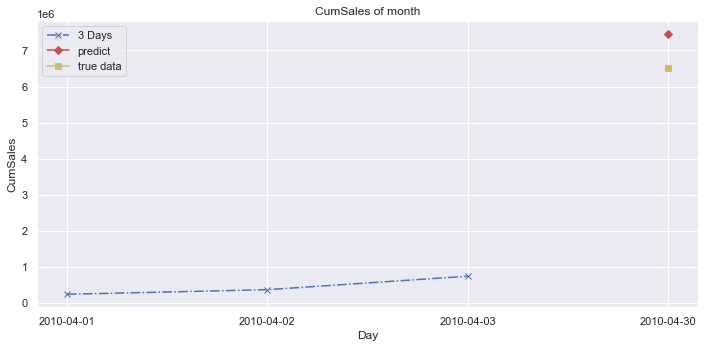

In [591]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [592]:
##### month 5 ##### linearRegression

# print(info[121:151])
# print(All_Group[A][114:142]) 


x_train = info[121:124,0]#10 วัน
y_train = info[121:124,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[150,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[150,1]],pred))
print("mean_squared_error =",mean_squared_error([info[150,1]],pred))
info[150,1]
# print(info[121:131,0])


MAE_VALUE.append(mean_absolute_error([info[150,1]],pred))
MSE_VALUE.append(mean_squared_error([info[150,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7807536.]
R2_core = 99.940
mean_absolute_error = 1555124.0
mean_squared_error = 2418410655376.0


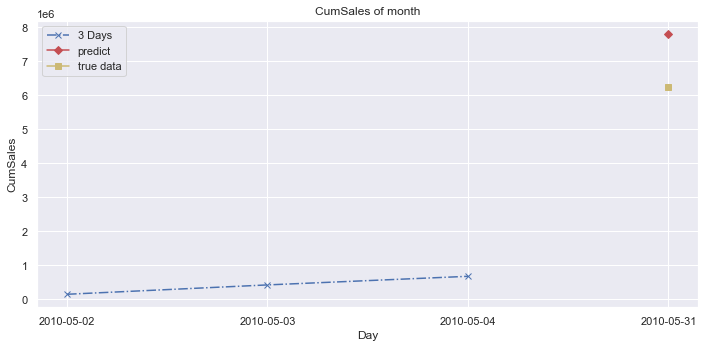

In [593]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [594]:
##### month 6 ##### linearRegression

# print(info[151:181])
# print(All_Group[A][114:142]) 


x_train = info[151:154,0]#10 วัน
y_train = info[151:154,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[180,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[180,1]],pred))
print("mean_squared_error =",mean_squared_error([info[180,1]],pred))
info[180,1]
# print(info[180,0])


MAE_VALUE.append(mean_absolute_error([info[180,1]],pred))
MSE_VALUE.append(mean_squared_error([info[180,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7023343.33333333]
R2_core = 98.985
mean_absolute_error = 617665.3333333284
mean_squared_error = 381510464001.77167


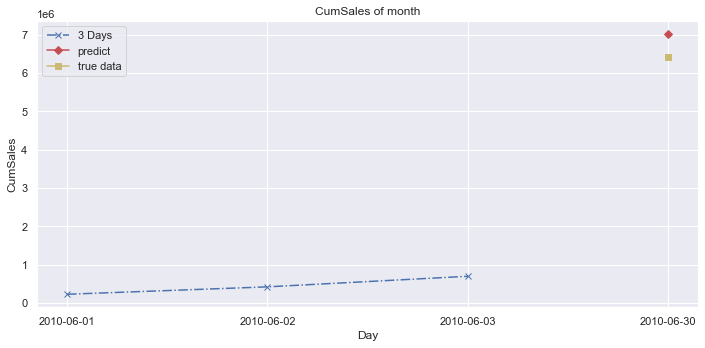

In [595]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [596]:
##### month 7 ##### linearRegression

# print(info[181:212])
# print(All_Group[A][114:142]) 


x_train = info[181:184,0]#10 วัน
y_train = info[181:184,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[211,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[211,1]],pred))
print("mean_squared_error =",mean_squared_error([info[211,1]],pred))
info[211,1]
# print(info[211])


MAE_VALUE.append(mean_absolute_error([info[211,1]],pred))
MSE_VALUE.append(mean_squared_error([info[211,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [6576621.83333334]
R2_core = 96.271
mean_absolute_error = 223795.16666666418
mean_squared_error = 50084276623.36


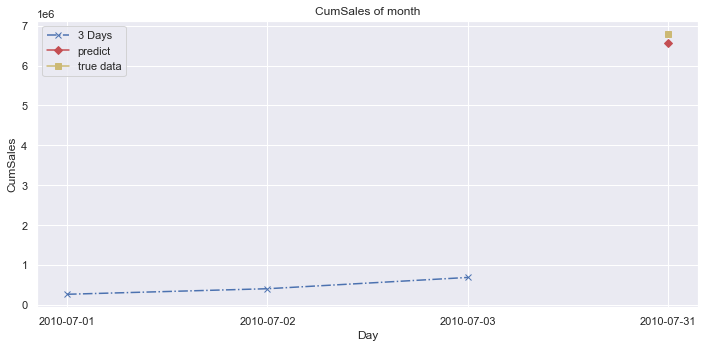

In [597]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [598]:
##### month 8 ##### linearRegression

# print(info[212:243])
# print(All_Group[A][114:142]) 


x_train = info[212:215,0]#10 วัน
y_train = info[212:215,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[242,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[242,1]],pred))
print("mean_squared_error =",mean_squared_error([info[242,1]],pred))
info[242,1]
# print(info[242])


MAE_VALUE.append(mean_absolute_error([info[242,1]],pred))
MSE_VALUE.append(mean_squared_error([info[242,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [8230861.66666666]
R2_core = 99.733
mean_absolute_error = 1509778.6666666567
mean_squared_error = 2279431622321.7476


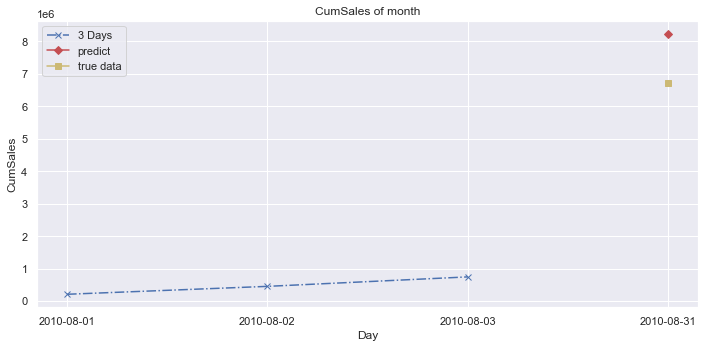

In [599]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [600]:
##### month 9 ##### linearRegression

# print(info[243:273])
# print(All_Group[A][114:142]) 


x_train = info[243:246,0]#10 วัน
y_train = info[243:246,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[272,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[272,1]],pred))
print("mean_squared_error =",mean_squared_error([info[272,1]],pred))
info[272,1]
# print(info[242])


MAE_VALUE.append(mean_absolute_error([info[272,1]],pred))
MSE_VALUE.append(mean_squared_error([info[272,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [6142807.66666666]
R2_core = 96.639
mean_absolute_error = 673450.3333333358
mean_squared_error = 453535351466.7811


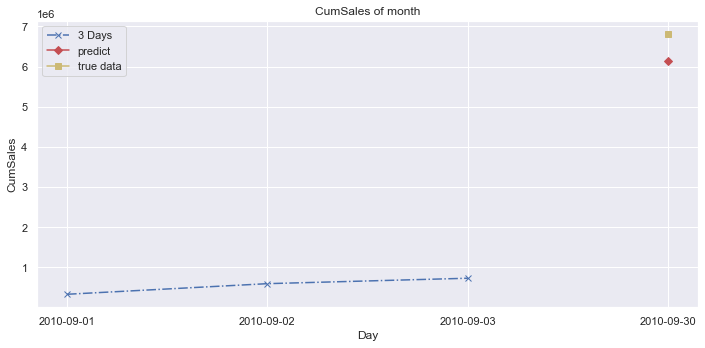

In [601]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [602]:
##### month 10 ##### linearRegression

# print(info[273:304])
# print(All_Group[A][114:142]) 


x_train = info[273:276,0]#10 วัน
y_train = info[273:276,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[303,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[303,1]],pred))
print("mean_squared_error =",mean_squared_error([info[303,1]],pred))
info[303,1]
# print(info[242])


MAE_VALUE.append(mean_absolute_error([info[303,1]],pred))
MSE_VALUE.append(mean_squared_error([info[303,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [6421978.83333333]
R2_core = 96.496
mean_absolute_error = 483690.16666667163
mean_squared_error = 233956177330.0326


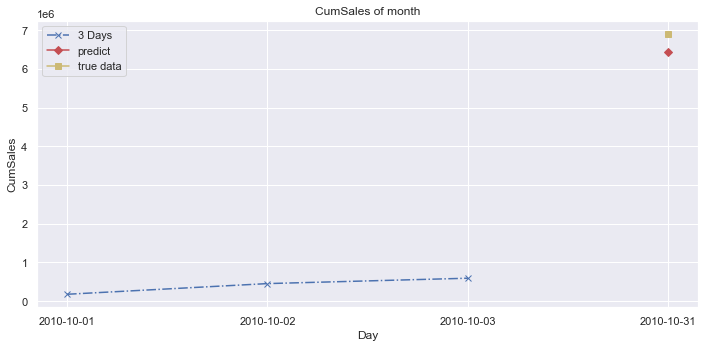

In [603]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [604]:
##### month 11 ##### linearRegression

# print(info[303:334])
# print(All_Group[A][114:142]) 

x_train = info[304:307,0]#10 วัน
y_train = info[304:307,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[333,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[333,1]],pred))
print("mean_squared_error =",mean_squared_error([info[333,1]],pred))
info[333,1]
# print(info[333])


MAE_VALUE.append(mean_absolute_error([info[333,1]],pred))
MSE_VALUE.append(mean_squared_error([info[333,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)

Predict_value =  [7086230.]
R2_core = 99.300
mean_absolute_error = 199348.0
mean_squared_error = 39739625104.0


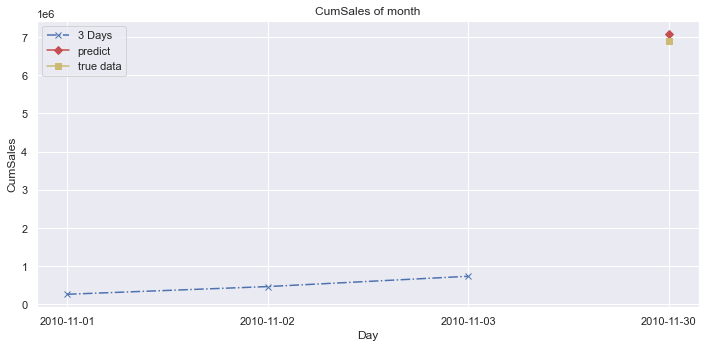

In [605]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [606]:
##### month 12 ##### linearRegression
# print(info[334:365])
# print(All_Group[A][114:142]) 

x_train = info[334:337,0]#3 วัน
y_train = info[334:337,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[363,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error =",mean_absolute_error([info[363,1]],pred))
print("mean_squared_error =",mean_squared_error([info[363,1]],pred))
info[364,1]

MAE_VALUE.append(mean_absolute_error([info[363,1]],pred))
MSE_VALUE.append(mean_squared_error([info[363,1]],pred))
R_score.append(r_score)


plot_st_day.append(x_train)
plot_stop_day.append(y_train)
plot_true_day.append(x)
plot_true_sale.append(x)
plot_pred.append(pred)


Predict_value =  [7826829.]
R2_core = 100.000
mean_absolute_error = 697075.0
mean_squared_error = 485913555625.0


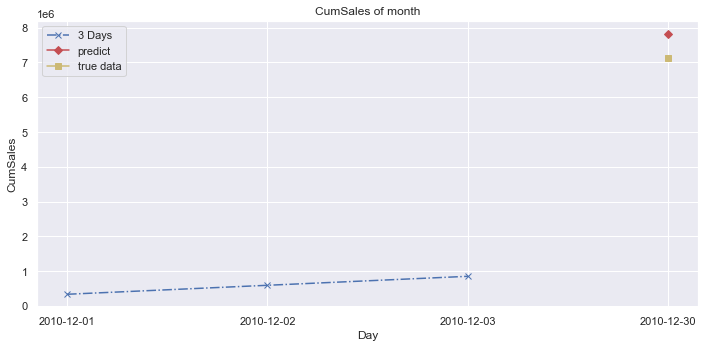

In [607]:
# plot 
inverse_d_new(info)
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Days',linestyle='-.')
plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of month')
plt.tight_layout()
plt.show()
transform_now(info)

In [608]:
# inverse_d_new(info)
# transform_now(info)


In [609]:

MAE_avg = np.average(MAE_VALUE)
MSE_avg = np.average(MSE_VALUE)
R2_score = np.average(R_score)


print("mean_absolute_error = ",MAE_avg)
print("mean_squared_error = ",MSE_avg)
print("R2_score %.3f" % (R2_score*100),"%")

mean_absolute_error =  812516.5430555543
mean_squared_error =  933700775326.54
R2_score 98.028 %


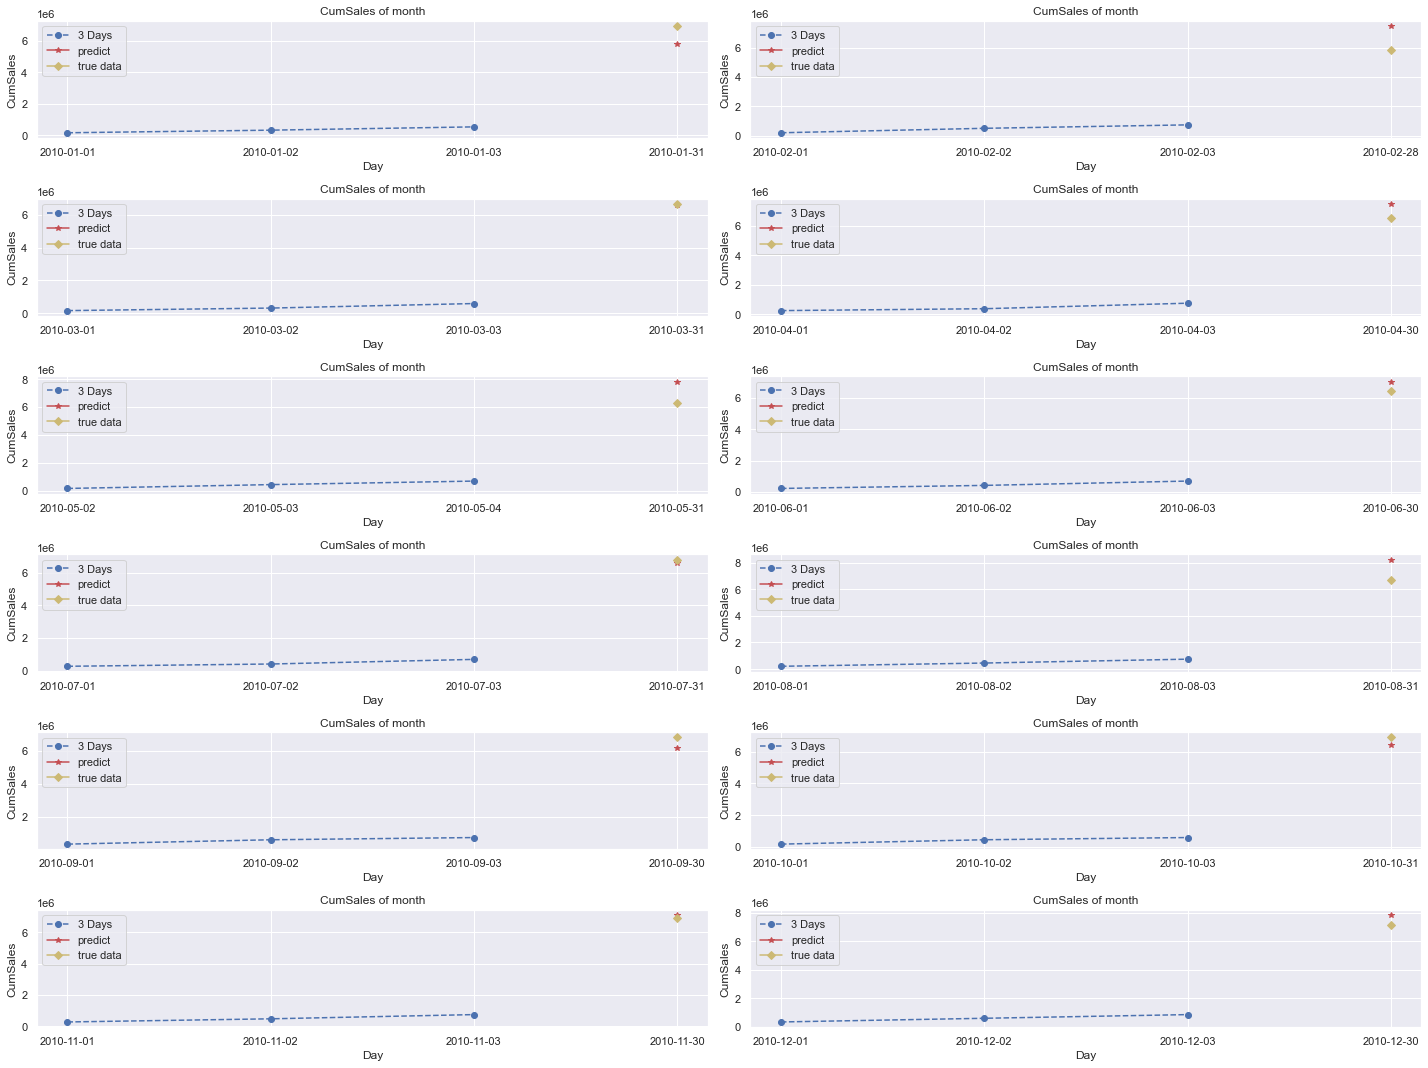

In [610]:
inverse_d_new(info)
# seaborn
sn.set_theme(style='darkgrid')
fig,axs = plt.subplots(nrows=6, ncols=2,figsize=(20,15))
index_for_plot = 0
for i in range(6):
    for j in range(2):
        index = plot_true_day[index_for_plot]
        axs[i,j].set_title('CumSales of month')
        axs[i,j].plot(plot_st_day[index_for_plot],plot_stop_day[index_for_plot],marker='o',label='3 Days',linestyle='--')
        axs[i,j].plot(info[index,0],plot_pred[index_for_plot],marker='*',color='r',label='predict')
        axs[i,j].plot(info[index,0],info[index,1],marker='D',color='y',label='true data')
        axs[i,j].set_xlabel('Day')
        axs[i,j].set_ylabel('CumSales')
        axs[i,j].legend(loc='upper left')
        plt.tight_layout()
        index_for_plot += 1
   

    

plot ข้อมูลของ 3 เดือนแรก ใน ปี 2010

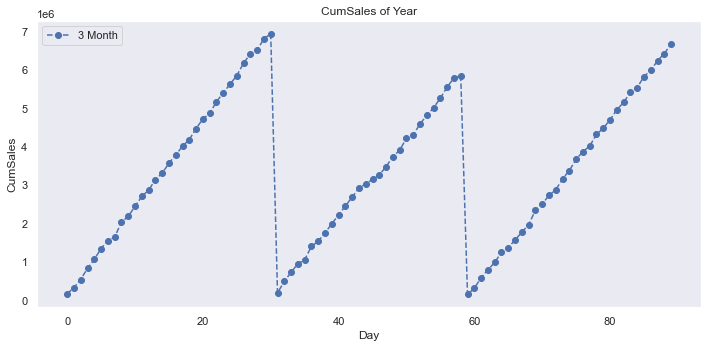

In [611]:
transform_now(info)
sn.set_theme(style='dark')
plt.figure(figsize=[10,5])
plt.plot(info[:90,0],info[:90,1],marker='o',label='3 Month',linestyle='--',color='b')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of Year')
plt.tight_layout()
plt.show()


In [612]:
##### month 1-3 ##### DecisionTreeRegressor predict 1 Year
from sklearn import tree 

x_train = info[:90,0]
y_train = info[:90,1]
dtree =  tree.DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[363,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error = ",mean_absolute_error([info[363,1]],pred))
print("mean_squared_error =",mean_squared_error([info[363,1]],pred))
# info[363,0]



Predict_value =  [6672657.]
R2_core = 100.000
mean_absolute_error =  457097.0
mean_squared_error = 208937667409.0


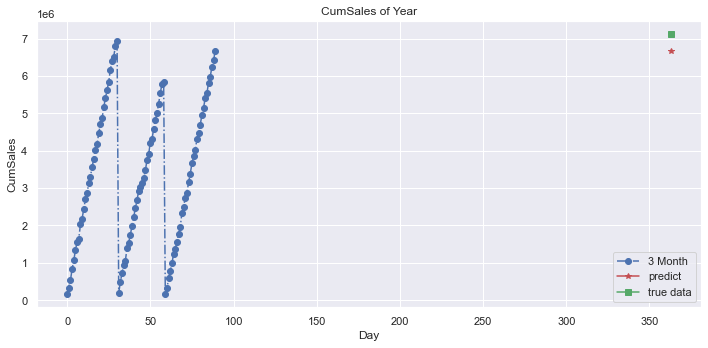

In [613]:

# inverse_d_new(info)
sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='o',label='3 Month',linestyle='-.',color='b')
plt.plot(info[x,0],pred,marker='*',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='g',label='true data')
# plt.plot([x_train[30],x_train[58],x_train[-1]],[y_train[30],y_train[58],y_train[-1]],marker='x',label='3 Month',linestyle='-.')
# plt.plot(info[x,0],pred,marker='D',color='r',label='predict')
# plt.plot(info[x,0],info[x,1],marker='s',color='y',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of Year')
plt.tight_layout()
plt.show()





[Text(0.58022030651341, 0.9545454545454546, 'X[0] <= 77.5\nsquared_error = 3666988797016.606\nsamples = 90\nvalue = 3353008.756'),
 Text(0.2332375478927203, 0.8636363636363636, 'X[0] <= 9.5\nsquared_error = 3349568494566.131\nsamples = 78\nvalue = 3027074.808'),
 Text(0.06896551724137931, 0.7727272727272727, 'X[0] <= 4.5\nsquared_error = 440779903749.29\nsamples = 10\nvalue = 1168047.9'),
 Text(0.038314176245210725, 0.6818181818181818, 'X[0] <= 2.5\nsquared_error = 106099453125.84\nsamples = 5\nvalue = 585317.6'),
 Text(0.022988505747126436, 0.5909090909090909, 'X[0] <= 1.5\nsquared_error = 23434803163.556\nsamples = 3\nvalue = 344766.667'),
 Text(0.01532567049808429, 0.5, 'X[0] <= 0.5\nsquared_error = 6810045529.0\nsamples = 2\nvalue = 247569.0'),
 Text(0.007662835249042145, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 165046.0'),
 Text(0.022988505747126436, 0.4090909090909091, 'squared_error = 0.0\nsamples = 1\nvalue = 330092.0'),
 Text(0.03065134099616858, 0.5, 'sq

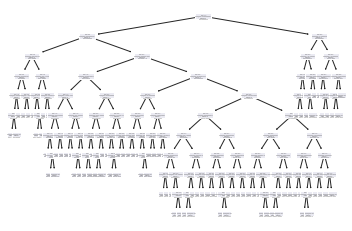

In [614]:
tree.plot_tree(dtree)

In [615]:
##### Year 1-3 ##### DecisionTreeRegressor predict 12 Year
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras

x_train = info[:1461,0]
y_train = info[:1461,1]
dtree =  DecisionTreeRegressor(max_depth=15)
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[4533,0]
pred=dtree.predict([[x]])
r_score =dtree.score(x_train.reshape(-1,1),y_train)

print("Predict_value = ",pred)
print("R2_core = %.3f" % (r_score*100))
print("mean_absolute_error = ",mean_absolute_error([info[4533,1]],pred))
print("mean_squared_error = ",mean_squared_error([info[4533,1]],pred))
# info[4534,0]

Predict_value =  [9474554.]
R2_core = 70.547
mean_absolute_error =  969785.0
mean_squared_error =  940482946225.0


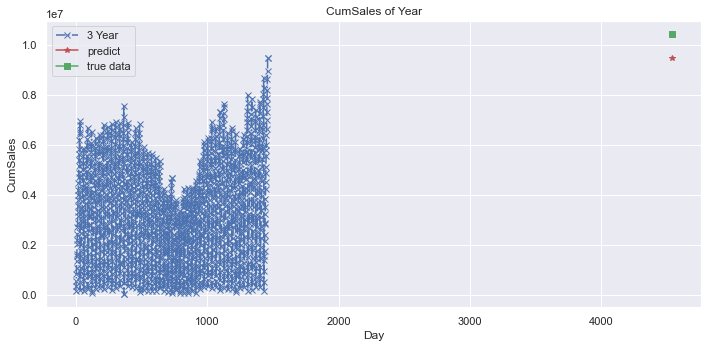

In [616]:
# transform_now(info)

sn.set_theme(style='darkgrid')
plt.figure(figsize=[10,5])
plt.plot(x_train,y_train,marker='x',label='3 Year',linestyle='-.',color='b')
plt.plot(info[x,0],pred,marker='*',color='r',label='predict')
plt.plot(info[x,0],info[x,1],marker='s',color='g',label='true data')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.title('CumSales of Year')
plt.tight_layout()
plt.show()
# inverse_d_new(info)
# print(info[4533,0])
# print(dtree.get_depth())